WARN: Could not seed environment <Grid instance>


Text(0,0.5,'y')

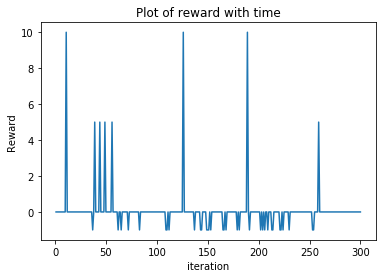

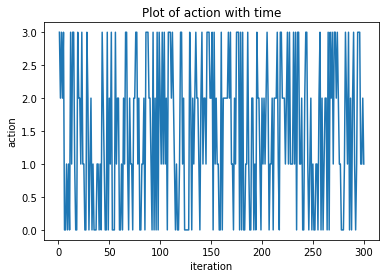

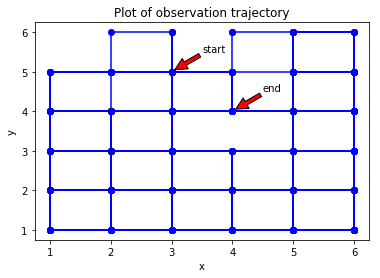

In [5]:
"""Homework 1: Problem 1
Implementing Environment for Grid World"""
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class Grid(gym.Env):            #deriving class Grid from base class gym.Env
    metadata = {
            'render.modes': ['human']
            }
    
    def __init__(self):        #constructor for the class Grid
        
        #specifying positions of A,B,A' and B'
        self.Ax = 2
        self.Ay = 5
        self.Bx = 4
        self.By = 5
        self.Ax_p = 2
        self.Ay_p = 1 
        self.Bx_p = 4
        self.By_p = 3
        
        self.action_space = spaces.Discrete(4)
        self.state_space = spaces.Discrete(5)
        
        self.seed()
        self.viewer = None
        self.state = None
        
        self.steps_beyond_done = None
        
    def step(self, action):
        assert self.action_space.contains(action), "%r (%s) invalid" %(action, type(action))
        state = self.state
        x = state[0] 
        y = state[1]
        x_old = state[0]
        y_old = state[1]
        done = False
        
        if x_old == self.Ax and y_old == self.Ay:
            x = self.Ax_p
            y = self.Ay_p
            reward = 10
        elif x_old == self.Bx and y_old == self.By:
            x = self.Bx_p
            y = self.By_p
            reward = 5
        elif action == 0:
            x = x_old
            y = y_old + 1
            reward = 0
        elif action == 1:
            x = x_old + 1
            y = y_old
            reward = 0
        elif action == 2:
            x = x_old
            y = y_old - 1
            reward = 0
        elif action == 3:
            x = x_old - 1
            y = y_old
            reward = 0
            
        if x > 5 or x < 0 or y > 5 or y < 0:
            x = x_old
            y = y_old
            reward = -1
            
        self.state = (x, y)
        
        return np.array(self.state), reward, done
    
    def reset(self):
        self.state = (env.state_space.sample()+1, env.state_space.sample()+1)
        return np.array(self.state)
    
    def render(self, mode = 'human'):
        width = 250
        height = 250
        scale = 50
        state = self.state
        x, y = state
        
        if self.viewer is None:
            from gym.envs.classic_control import rendering
            self.viewer = rendering.Viewer(width, height)
            for i in range(6):
                p1_y = i * scale
                p1_x = 0
                p2_y = i * scale
                p2_x = 5 * scale
                l = self.viewer.draw_line((p1_x,p1_y), (p2_x, p2_y))
                self.viewer.add_geom(l)
            for i in range(6):
                p1_y = 0
                p1_x = i * scale
                p2_y = 5 * scale
                p2_x = i * scale
                l = self.viewer.draw_line((p1_x,p1_y), (p2_x, p2_y))
                self.viewer.add_geom(l)
            
            agent_size = 20
            left = -agent_size
            right = agent_size
            top = agent_size
            bottom = -agent_size
            
            agent = rendering.FilledPolygon([(left, bottom), (left,top), (right,top), (right, bottom)])
            self.agent_trans = rendering.Transform()
            agent.add_attr(self.agent_trans)
            agent.set_color(0,0,0)
            self.viewer.add_geom(agent)
            
        if self.state is None:
            return None
        
        self.agent_trans.set_translation((x-0.5)*50, (y-0.5)*50)
        
        return self.viewer.render(return_rgb_array=mode == 'rbg_array')
    
    def close(self):
        if self.viewer:
            self.viewer.close()
            
env = Grid()

reward = 0
reward_list = []
action_list = []
x_list = []
y_list = []
iteration = [test+1 for test in range(300)]

for i in range(1):
    obs = env.reset()
    for t in range(300):
        #env.render()
        action = env.action_space.sample()
        observation, reward, done = env.step(action)
        reward_list.append(reward)
        action_list.append(action)
        x_list.append(observation[0]+1)
        y_list.append(observation[1]+1)
        
env.close()

plt.figure(1)
plt.title('Plot of reward with time')
plt.plot(iteration,reward_list)
plt.xlabel('iteration')
plt.ylabel('Reward')

plt.figure(2)
plt.title('Plot of action with time')
plt.plot(iteration,action_list)
plt.xlabel('iteration')
plt.ylabel('action')

fig = plt.figure(3)
ax = fig.add_subplot(111)
plt.title('Plot of observation trajectory')
plt.plot(x_list,y_list,'bo-')
ax.annotate('start', xy=(x_list[0]+0.05, y_list[0]+0.05), xytext=(x_list[0]+0.5, y_list[0]+0.5), arrowprops=dict(facecolor='Red', shrink=0.01),)
ax.annotate('end', xy=(x_list[-1]+0.05, y_list[-1]+0.05), xytext=(x_list[-1]+0.5, y_list[-1]+0.5), arrowprops=dict(facecolor='Red', shrink=0.01),)
plt.xlabel('x')
plt.ylabel('y')